## Day 82 Lecture 1 Assignment

In this assignment, we will learn about activation functions. We will create a neural network and measure the model's performance using different activations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


We will import the famous titanic dataset below and produce a neural network that will predict the chance of survival for a passenger.

In [2]:
titanic = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We'll perform some feature engineering

Let's start by keeping only the columns we'd like to use for our analysis. Keep only the columns: Survived, Pclass, Sex, SibSp, Parch, and Embarked

In [4]:
# make a list of columns to keep
columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']

# make new dataframe with only relevent columns
titanic2 = titanic[columns]
titanic2.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


Now examine how many rows contain missing data. Given how much missing data we have, should we remove the column with the most missing data, or remove all rows containing missing data? Do what you think is best.

In [5]:
# Answer below: 
print(titanic2.shape)
print('--------------')
print('Null Values:')
titanic2.isnull().sum()


(891, 6)
--------------
Null Values:


Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [6]:
# drop missing values
titanic3 = titanic2.dropna()

print('Null Values:')
titanic3.isnull().sum()

Null Values:


Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Now we'll create a one hot encoding of the variables Pclass, sex, and Embarked

In [7]:
# get_dummies for our non-numeric categorical variables
titanic4 = pd.get_dummies(data=titanic3,columns=['Pclass', 'Sex', 'Embarked'],drop_first=True)

titanic4.head()

,Survived,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,0,1,1,0,1
1,1,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1
3,1,1,0,0,0,0,0,1
4,0,0,0,0,1,1,0,1


Split the data into train and test. 20% of the data should be set aside for testing. Use Survived as your target variable.

In [8]:
from sklearn.model_selection import train_test_split

# define X and y
X = titanic4.drop('Survived', axis=1)
y = titanic4['Survived']

# test/train split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

At this point, we are ready to create a model. Import `Sequential` and `Dense` from Keras

In [9]:
# import deep learning methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Create a model with 5 layers. The first layer should be a dense layer that receives the input, the last layer should be of size 1. You determine the remaining layer sizes.

Use a tanh activation for the output layer.

In [10]:
# instantiate model
tanh_model = Sequential()
# first layer
tanh_model.add(Dense(80, input_dim=X_train.shape[1] ,activation='relu'))
# second layer
tanh_model.add(Dense(60 ,activation='relu'))
# third layer
tanh_model.add(Dense(60 ,activation='relu'))
# fourth layer
tanh_model.add(Dense(60 ,activation='relu'))
# fifth layer/output layer with tanh activation
tanh_model.add(Dense(1 ,activation='tanh'))


In [11]:
tanh_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 61        
Total params: 12,881
Trainable params: 12,881
Non-trainable params: 0
_________________________________________________________________


Compile the model using the adam optimizer, binary crossentropy loss, and the accuracy metric.

Fit the model using a batch size of 80 over 200 epochs.

In [12]:
# compile model
tanh_model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])


In [13]:
# fit model and save to history
history = tanh_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=80, epochs=200, verbose=2)

Epoch 1/200
9/9 - 1s - loss: 1.5490 - accuracy: 0.5851 - val_loss: 0.7613 - val_accuracy: 0.5899
Epoch 2/200
9/9 - 0s - loss: 0.7593 - accuracy: 0.5992 - val_loss: 0.7295 - val_accuracy: 0.6180
Epoch 3/200
9/9 - 0s - loss: 0.6862 - accuracy: 0.6203 - val_loss: 0.6514 - val_accuracy: 0.6124
Epoch 4/200
9/9 - 0s - loss: 0.6386 - accuracy: 0.6160 - val_loss: 0.6121 - val_accuracy: 0.6124
Epoch 5/200
9/9 - 0s - loss: 0.5902 - accuracy: 0.6821 - val_loss: 0.5685 - val_accuracy: 0.7135
Epoch 6/200
9/9 - 0s - loss: 0.5467 - accuracy: 0.7412 - val_loss: 0.5232 - val_accuracy: 0.7191
Epoch 7/200
9/9 - 0s - loss: 0.5089 - accuracy: 0.7679 - val_loss: 0.4937 - val_accuracy: 0.7697
Epoch 8/200
9/9 - 0s - loss: 0.4733 - accuracy: 0.8087 - val_loss: 0.4801 - val_accuracy: 0.7584
Epoch 9/200
9/9 - 0s - loss: 0.4656 - accuracy: 0.8003 - val_loss: 0.5213 - val_accuracy: 0.7247
Epoch 10/200
9/9 - 0s - loss: 0.4903 - accuracy: 0.7764 - val_loss: 0.5306 - val_accuracy: 0.7022
Epoch 11/200
9/9 - 0s - loss:

In [14]:
# dataframe with epoch history
tanh_model_df = pd.DataFrame(history.history)
tanh_model_df.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.358397,0.842475,0.878655,0.758427
196,0.357837,0.842475,0.882364,0.758427
197,0.358487,0.845288,0.878084,0.747191
198,0.358721,0.843882,0.881694,0.752809
199,0.359377,0.838256,0.885120,0.747191


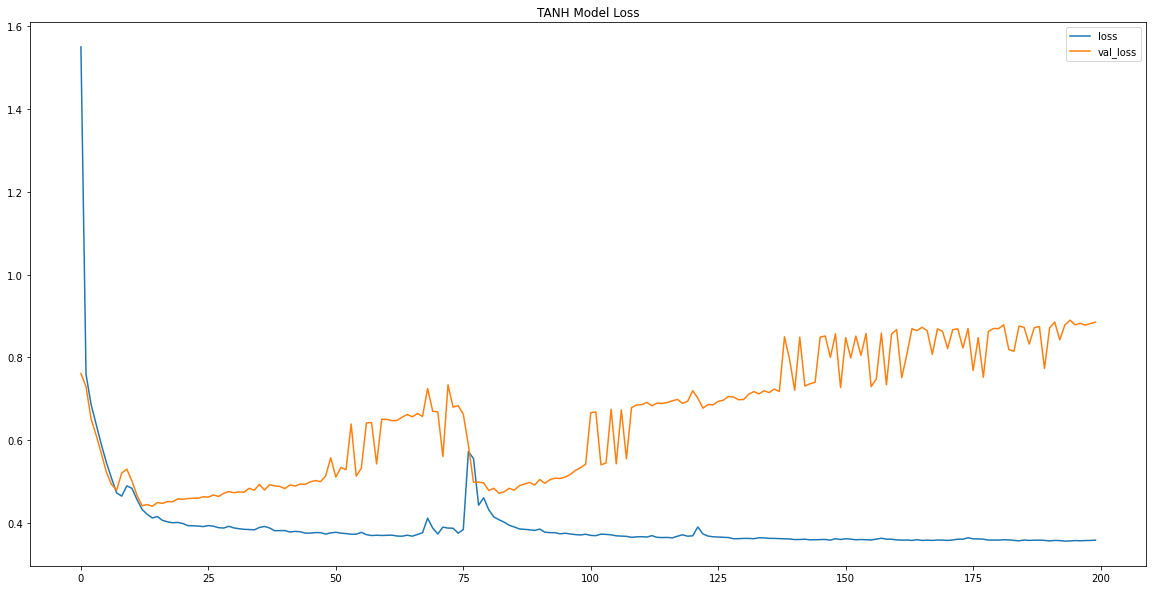

In [15]:
# plot model loss over epochs
tanh_model_df[['loss', 'val_loss']].plot(figsize=(20,10))
plt.title('TANH Model Loss')
plt.show()

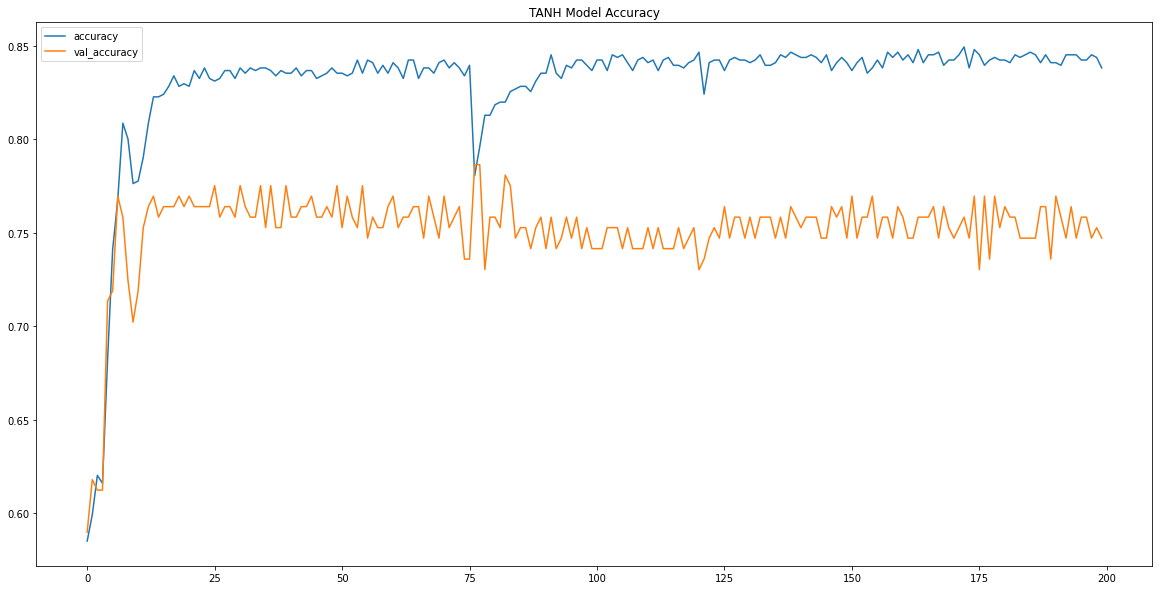

In [16]:
# plot model accuracy over epochs
tanh_model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.title('TANH Model Accuracy')
plt.show()

In [17]:
# final epoch tanh model results
tanh_results = tanh_model.evaluate(X_test, y_test, verbose=0)
print("tanh loss: ", round(tanh_results[0],6))
print("tanh accuracy: ", round(tanh_results[1],6))

tanh loss:  0.88512
tanh accuracy:  0.747191


Redefine the model using a sigmoid activation for the last layer. What is the difference in accuracy.

In [18]:
# instantiate model
sig_model = Sequential()
# first layer
sig_model.add(Dense(80, input_dim=X_train.shape[1] ,activation='relu'))
# second layer
sig_model.add(Dense(60 ,activation='relu'))
# third layer
sig_model.add(Dense(60 ,activation='relu'))
# fourth layer
sig_model.add(Dense(60 ,activation='relu'))
# fifth layer/output layer with sigmoid activation
sig_model.add(Dense(1 ,activation='sigmoid'))

In [19]:
sig_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 80)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_7 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_8 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 61        
Total params: 12,881
Trainable params: 12,881
Non-trainable params: 0
_________________________________________________________________


In [20]:
# compile model
sig_model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [21]:
# fit model and save to history
history = sig_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=80, epochs=200, verbose=2)

Epoch 1/200
9/9 - 1s - loss: 0.6401 - accuracy: 0.6160 - val_loss: 0.6112 - val_accuracy: 0.6236
Epoch 2/200
9/9 - 0s - loss: 0.5937 - accuracy: 0.6160 - val_loss: 0.5749 - val_accuracy: 0.6348
Epoch 3/200
9/9 - 0s - loss: 0.5586 - accuracy: 0.6807 - val_loss: 0.5428 - val_accuracy: 0.6854
Epoch 4/200
9/9 - 0s - loss: 0.5341 - accuracy: 0.7651 - val_loss: 0.5158 - val_accuracy: 0.7921
Epoch 5/200
9/9 - 0s - loss: 0.5096 - accuracy: 0.7989 - val_loss: 0.4937 - val_accuracy: 0.7809
Epoch 6/200
9/9 - 0s - loss: 0.4909 - accuracy: 0.8059 - val_loss: 0.4787 - val_accuracy: 0.7753
Epoch 7/200
9/9 - 0s - loss: 0.4716 - accuracy: 0.8059 - val_loss: 0.4654 - val_accuracy: 0.7753
Epoch 8/200
9/9 - 0s - loss: 0.4561 - accuracy: 0.8087 - val_loss: 0.4597 - val_accuracy: 0.7809
Epoch 9/200
9/9 - 0s - loss: 0.4440 - accuracy: 0.8158 - val_loss: 0.4487 - val_accuracy: 0.7640
Epoch 10/200
9/9 - 0s - loss: 0.4328 - accuracy: 0.8115 - val_loss: 0.4510 - val_accuracy: 0.7640
Epoch 11/200
9/9 - 0s - loss:

In [22]:
# dataframe with epoch history
sig_model_df = pd.DataFrame(history.history)
sig_model_df.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.365884,0.839662,0.615370,0.764045
196,0.361065,0.845288,0.634291,0.741573
197,0.363746,0.842475,0.628489,0.764045
198,0.362180,0.842475,0.636623,0.724719
199,0.360627,0.839662,0.628206,0.764045


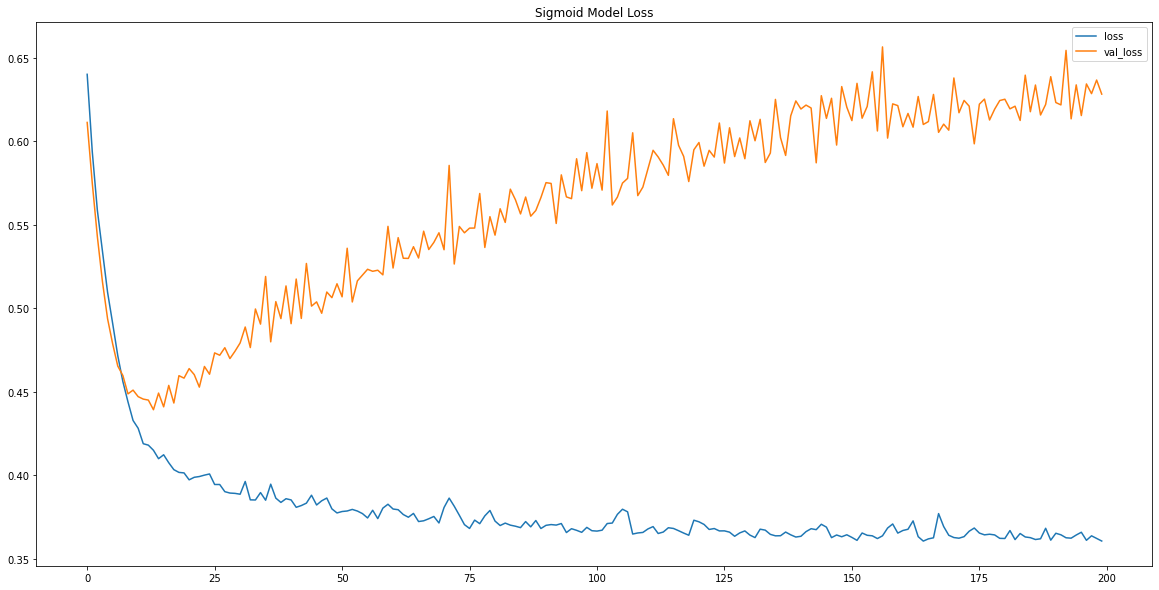

In [23]:
# plot model loss over epochs
sig_model_df[['loss', 'val_loss']].plot(figsize=(20,10))
plt.title('Sigmoid Model Loss')
plt.show()

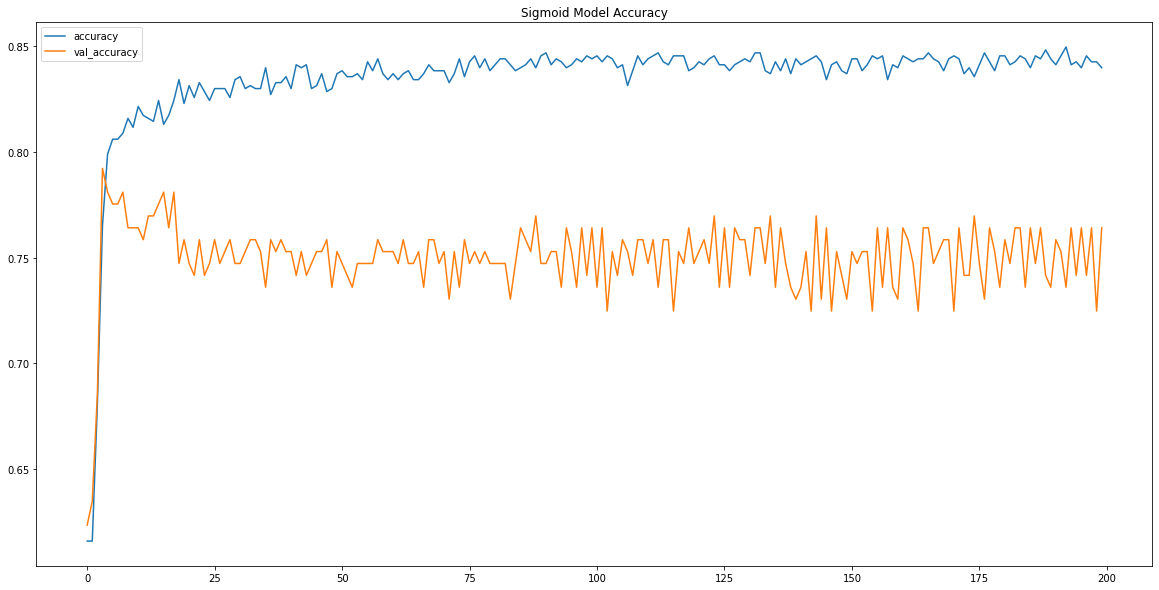

In [24]:
# plot model accuracy over epochs
sig_model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
plt.title('Sigmoid Model Accuracy')
plt.show()

In [25]:
# final epoch sigmoid model results
sig_results = sig_model.evaluate(X_test, y_test, verbose=0)
print("sigmoid loss: ", round(sig_results[0],6))
print("sigmoid accuracy: ", round(sig_results[1],6))

sigmoid loss:  0.628206
sigmoid accuracy:  0.764045


In [26]:
# final epoch tanh model results
tanh_results = tanh_model.evaluate(X_test, y_test, verbose=0)
print("tanh loss: ", round(tanh_results[0],6))
print("tanh accuracy: ", round(tanh_results[1],6))

tanh loss:  0.88512
tanh accuracy:  0.747191
